- 文字檔透過外部套件(pydantic)轉換型別，最後輸出python的資料結構

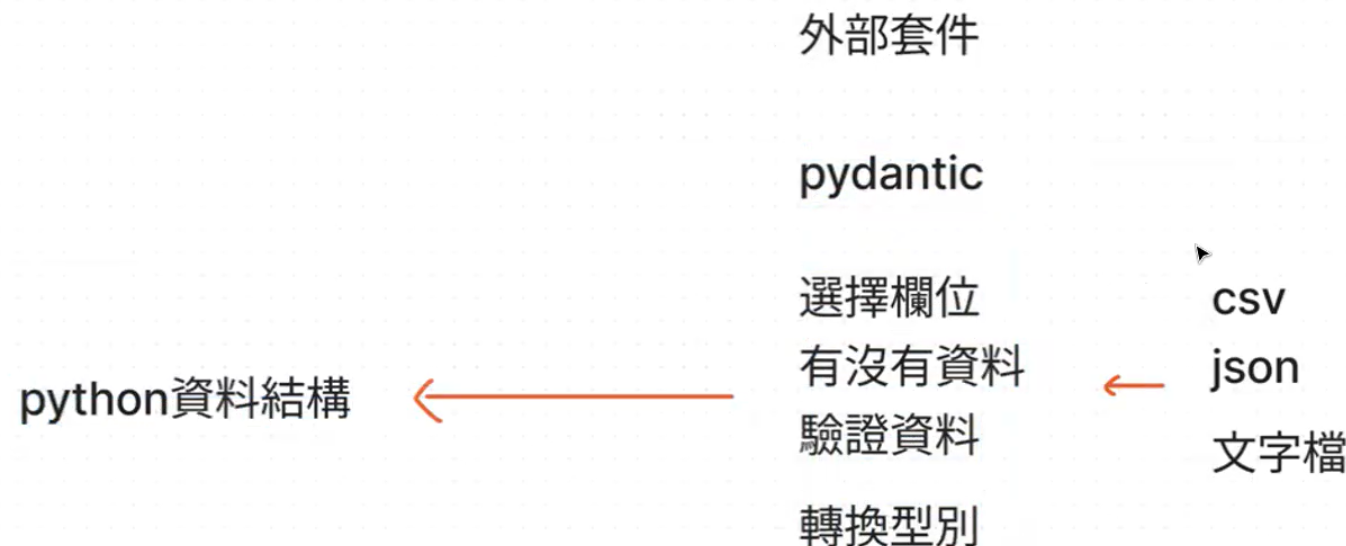

- pydantic給了2個繼承函式可以使用。
- 在requirements灌入pydantic使用

### 操作方式和DataClass一樣

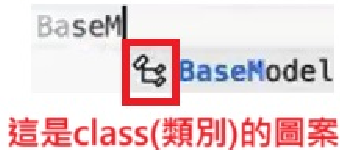
- class是用來繼承的

In [2]:
from pydantic import BaseModel #BaseModel專門用來繼承的

class Person(BaseModel): #繼承 定義隨機一個Person來繼承BaseModel的功能
    #field一定要有type hint
    first_name:str
    last_name:str
    age:int

p = Person(first_name="Jone", last_name="Smith", age=30)

print(p.first_name)
print(p.last_name)
print(p.age)
print(p)
    

Jone
Smith
30
first_name='Jone' last_name='Smith' age=30


### 上面程式碼講解
建立 Person 模型：
- 使用 Pydantic 庫中的 BaseModel 作為基類，定義了一個名為 Person 的類別。
- Person 類別中有三個屬性：first_name（名字）、last_name（姓氏）和 age（年齡）。
- 每個屬性都有指定的資料型別（str 或 int），這確保了當我們創建 Person 類的實例時，這些屬性必須符合相應的型別。


初始化 Person 的實例：
- 使用 Person(first_name="Jone", last_name="Smith", age=42) 創建了一個 Person 類的實例，並賦值給變數 p。
- 這意味著我們創建了一個名為 p 的對象，其中包含了 first_name、last_name 和 age 這三個屬性，並且分別設置了值 "Jone"、"Smith" 和 42。


輸出屬性：
- 使用 print(p.first_name) 來取得 p 這個對象的 first_name 屬性的值，並將其輸出到控制台，即 "Jone"。
- 使用 print(p.last_name) 來取得 p 的 last_name 屬性的值，並將其輸出，即 "Smith"。
- 使用 print(p.age) 來取得 p 的 age 屬性的值，並將其輸出，即 42。
- 最後，使用 print(p) 會輸出 p 這個對象的完整表示形式。由於 Person 繼承自 Pydantic 的 BaseModel，因此這個表示會顯示出模型中的所有屬性和值，例如 first_name='Jone' last_name='Smith' age=42。

## dataclass做不到的
- 驗證資料

In [4]:
p1 = Person(first_name="Jone", last_name="Smith", age=30) #自動轉換型別
print(p1)

first_name='Jone' last_name='Smith' age=30


In [3]:
try:
    p2 = Person(first_name="Jone", last_name="Smith", age="abc") #自動轉換型別
except Exception as error:  #使用try...except將錯誤輸出
    print(error)

1 validation error for Person
age
  Input should be a valid integer, unable to parse string as an integer [type=int_parsing, input_value='abc', input_type=str]
    For further information visit https://errors.pydantic.dev/2.8/v/int_parsing


## 可以將純文字轉成pydantic實體
- model_validate_json()

In [ ]:
data_json = '''
{
    "first_name":"john",
    "last_name":"Smith",
    "age":"42"
}
'''
p3 = Person.model_validate_json(data_json)
print(p3)

### 定義 data_json
1. data_json 是一個多行字符串：這裡使用了三引號 (''') 來定義一個多行字符串，這個字符串表示了一個 JSON 格式的數據。
2. JSON 的內容：
- "first_name": "john"
- "last_name": "Smith"
- "age": "42"（注意這裡 "age" 的值是字符串，而不是整數）


### 使用 model_validate_json 方法
1. model_validate_json 是什麼：
- model_validate_json 是 Pydantic 提供的一個方法，用來從 JSON 字符串中加載數據並創建模型實例。
2. 這行程式碼的作用：
- 它會將 data_json 這個 JSON 字符串中的數據解析為 Python 對象，並使用這些數據來創建一個 Person 模型的實例 p3。
- Pydantic 會自動將 "age" 的值從字符串 "42" 轉換為整數 42，因為 Person 模型要求 age 是整數類型。


### 輸出p
1. 這行程式碼會輸出 p3，它是一個 Person 類型的實例，包含了從 JSON 中解析出的屬性和值。
2. 輸出的內容將會是 Person(first_name='john', last_name='Smith', age=42)，展示了 Person 實例的各個屬性。